In [1]:
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import numpy as np

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 17, 'legend.fontsize': 17})    

rank = 10
rng = np.arange(0, rank) + 1
ticks = np.arange(0, (len(rng) + 1), 1)

def get_avg(fpr_val, tpr_val):
    range_eval = np.arange(0, 1, 1e-6)
    # total_fpr = np.empty((0, range_eval.shape[0]), int)
    total_tpr = np.empty((0, range_eval.shape[0]), int)
    
    for ds in fpr_val:
        interp_y = np.interp(range_eval, fpr_val[ds], tpr_val[ds])
        total_tpr = np.append(total_tpr, np.array([interp_y]), axis=0)
    avg_tpr = np.mean(total_tpr, axis=0)

    return range_eval, avg_tpr

In [2]:
# PF-GLSR
pf_glsr_peri_cmc_dict = torch.load('../data/cmc/pf_glsr/intra_peri/peri_cmc_dict.pt')
pf_glsr_peri_avg_dict = torch.load('../data/cmc/pf_glsr/intra_peri/peri_avg_dict.pt')

# CMB-Net
cmb_net_peri_cmc_dict = torch.load('../data/cmc/cmb_net/intra_peri/peri_cmc_dict.pt')
cmb_net_peri_avg_dict = torch.load('../data/cmc/cmb_net/intra_peri/peri_avg_dict.pt')
cmb_net_inter_cmc_dict_p = torch.load('../data/cmc/cmb_net/inter_peri-face/cm_cmc_dict_p.pt')
cmb_net_inter_avg_dict_p = torch.load('../data/cmc/cmb_net/inter_peri-face/cm_avg_dict_p.pt')

# HA-ViT
havit_peri_cmc_dict = torch.load('../data/cmc/ha_vit/intra_peri/peri_cmc_dict.pt')
havit_peri_avg_dict = torch.load('../data/cmc/ha_vit/intra_peri/peri_avg_dict.pt')
havit_inter_cmc_dict_p = torch.load('../data/cmc/ha_vit/inter_peri-face/cm_cmc_dict_p.pt')
havit_inter_avg_dict_p = torch.load('../data/cmc/ha_vit/inter_peri-face/cm_avg_dict_p.pt')

# GC2SA-Net
peri_cmc_dict = torch.load('../data/cmc/gc2sa_net/intra_peri/peri_cmc_dict.pt')
peri_avg_dict = torch.load('../data/cmc/gc2sa_net/intra_peri/peri_avg_dict.pt')
inter_cmc_dict_p = torch.load('../data/cmc/gc2sa_net/inter_peri-face/cm_cmc_dict_p.pt')
inter_avg_dict_p = torch.load('../data/cmc/gc2sa_net/inter_peri-face/cm_avg_dict_p.pt')

In [4]:
# PF-GLSR
pf_glsr_peri_eer_dict = torch.load('../data/roc/pf_glsr/intra_peri/peri_eer_dict.pt')
pf_glsr_peri_fpr_dict = torch.load('../data/roc/pf_glsr/intra_peri/peri_fpr_dict.pt')
pf_glsr_peri_tpr_dict = torch.load('../data/roc/pf_glsr/intra_peri/peri_tpr_dict.pt')
pf_glsr_peri_auc_dict = torch.load('../data/roc/pf_glsr/intra_peri/peri_auc_dict.pt')

# CMB-Net
cmb_net_peri_eer_dict = torch.load('../data/roc/cmb_net/intra_peri/peri_eer_dict.pt')
cmb_net_peri_fpr_dict = torch.load('../data/roc/cmb_net/intra_peri/peri_fpr_dict.pt')
cmb_net_peri_tpr_dict = torch.load('../data/roc/cmb_net/intra_peri/peri_tpr_dict.pt')
cmb_net_peri_auc_dict = torch.load('../data/roc/cmb_net/intra_peri/peri_auc_dict.pt')
cmb_net_inter_eer_dict = torch.load('../data/roc/cmb_net/inter_peri-face/cm_eer_dict.pt')
cmb_net_inter_fpr_dict = torch.load('../data/roc/cmb_net/inter_peri-face/cm_fpr_dict.pt')
cmb_net_inter_tpr_dict = torch.load('../data/roc/cmb_net/inter_peri-face/cm_tpr_dict.pt')
cmb_net_inter_auc_dict = torch.load('../data/roc/cmb_net/inter_peri-face/cm_auc_dict.pt')

# HA-ViT
havit_peri_eer_dict = torch.load('../data/roc/ha_vit/intra_peri/peri_eer_dict.pt')
havit_peri_fpr_dict = torch.load('../data/roc/ha_vit/intra_peri/peri_fpr_dict.pt')
havit_peri_tpr_dict = torch.load('../data/roc/ha_vit/intra_peri/peri_tpr_dict.pt')
havit_peri_auc_dict = torch.load('../data/roc/ha_vit/intra_peri/peri_auc_dict.pt')
havit_inter_eer_dict = torch.load('../data/roc/ha_vit/inter_peri-face/cm_eer_dict.pt')
havit_inter_fpr_dict = torch.load('../data/roc/ha_vit/inter_peri-face/cm_fpr_dict.pt')
havit_inter_tpr_dict = torch.load('../data/roc/ha_vit/inter_peri-face/cm_tpr_dict.pt')
havit_inter_auc_dict = torch.load('../data/roc/ha_vit/inter_peri-face/cm_auc_dict.pt')

# GC2SA-Net
peri_eer_dict = torch.load('../data/roc/gc2sa_net/intra_peri/peri_eer_dict.pt')
peri_fpr_dict = torch.load('../data/roc/gc2sa_net/intra_peri/peri_fpr_dict.pt')
peri_tpr_dict = torch.load('../data/roc/gc2sa_net/intra_peri/peri_tpr_dict.pt')
peri_auc_dict = torch.load('../data/roc/gc2sa_net/intra_peri/peri_auc_dict.pt')
inter_eer_dict = torch.load('../data/roc/gc2sa_net/inter_peri-face/cm_eer_dict.pt')
inter_fpr_dict = torch.load('../data/roc/gc2sa_net/inter_peri-face/cm_fpr_dict.pt')
inter_tpr_dict = torch.load('../data/roc/gc2sa_net/inter_peri-face/cm_tpr_dict.pt')
inter_auc_dict = torch.load('../data/roc/gc2sa_net/inter_peri-face/cm_auc_dict.pt')

In [5]:
peri_avg, inter_avg = [], []
pf_glsr_peri_avg = []
cmb_net_peri_avg, cmb_net_inter_avg = [], []
havit_peri_avg, havit_inter_avg = [], []

for ds_ in peri_auc_dict:
    pf_glsr_peri_avg.append(pf_glsr_peri_auc_dict[ds_])

    cmb_net_peri_avg.append(cmb_net_peri_auc_dict[ds_])
    cmb_net_inter_avg.append(cmb_net_inter_auc_dict[ds_])

    havit_peri_avg.append(havit_peri_auc_dict[ds_])
    havit_inter_avg.append(havit_inter_auc_dict[ds_])

    peri_avg.append(peri_auc_dict[ds_])
    inter_avg.append(inter_auc_dict[ds_])

pf_glsr_peri_avg = np.mean(np.array(pf_glsr_peri_avg), 0)
cmb_net_peri_avg = np.mean(np.array(cmb_net_peri_avg), 0)
cmb_net_inter_avg = np.mean(np.array(cmb_net_inter_avg), 0)
havit_peri_avg = np.mean(np.array(havit_peri_avg), 0)
havit_inter_avg = np.mean(np.array(havit_inter_avg), 0)
peri_avg = np.mean(np.array(peri_avg), 0)
inter_avg = np.mean(np.array(inter_avg), 0)

range_, pf_glsr_peri_tpr = get_avg(pf_glsr_peri_fpr_dict, pf_glsr_peri_tpr_dict)
range_, cmb_net_peri_tpr = get_avg(cmb_net_peri_fpr_dict, cmb_net_peri_tpr_dict)
range_, cmb_net_inter_tpr = get_avg(cmb_net_inter_fpr_dict, cmb_net_inter_tpr_dict)
range_, havit_peri_tpr = get_avg(havit_peri_fpr_dict, havit_peri_tpr_dict)
range_, havit_inter_tpr = get_avg(havit_inter_fpr_dict, havit_inter_tpr_dict)
range_, peri_tpr = get_avg(peri_fpr_dict, peri_tpr_dict)
range_, inter_tpr = get_avg(inter_fpr_dict, inter_tpr_dict)

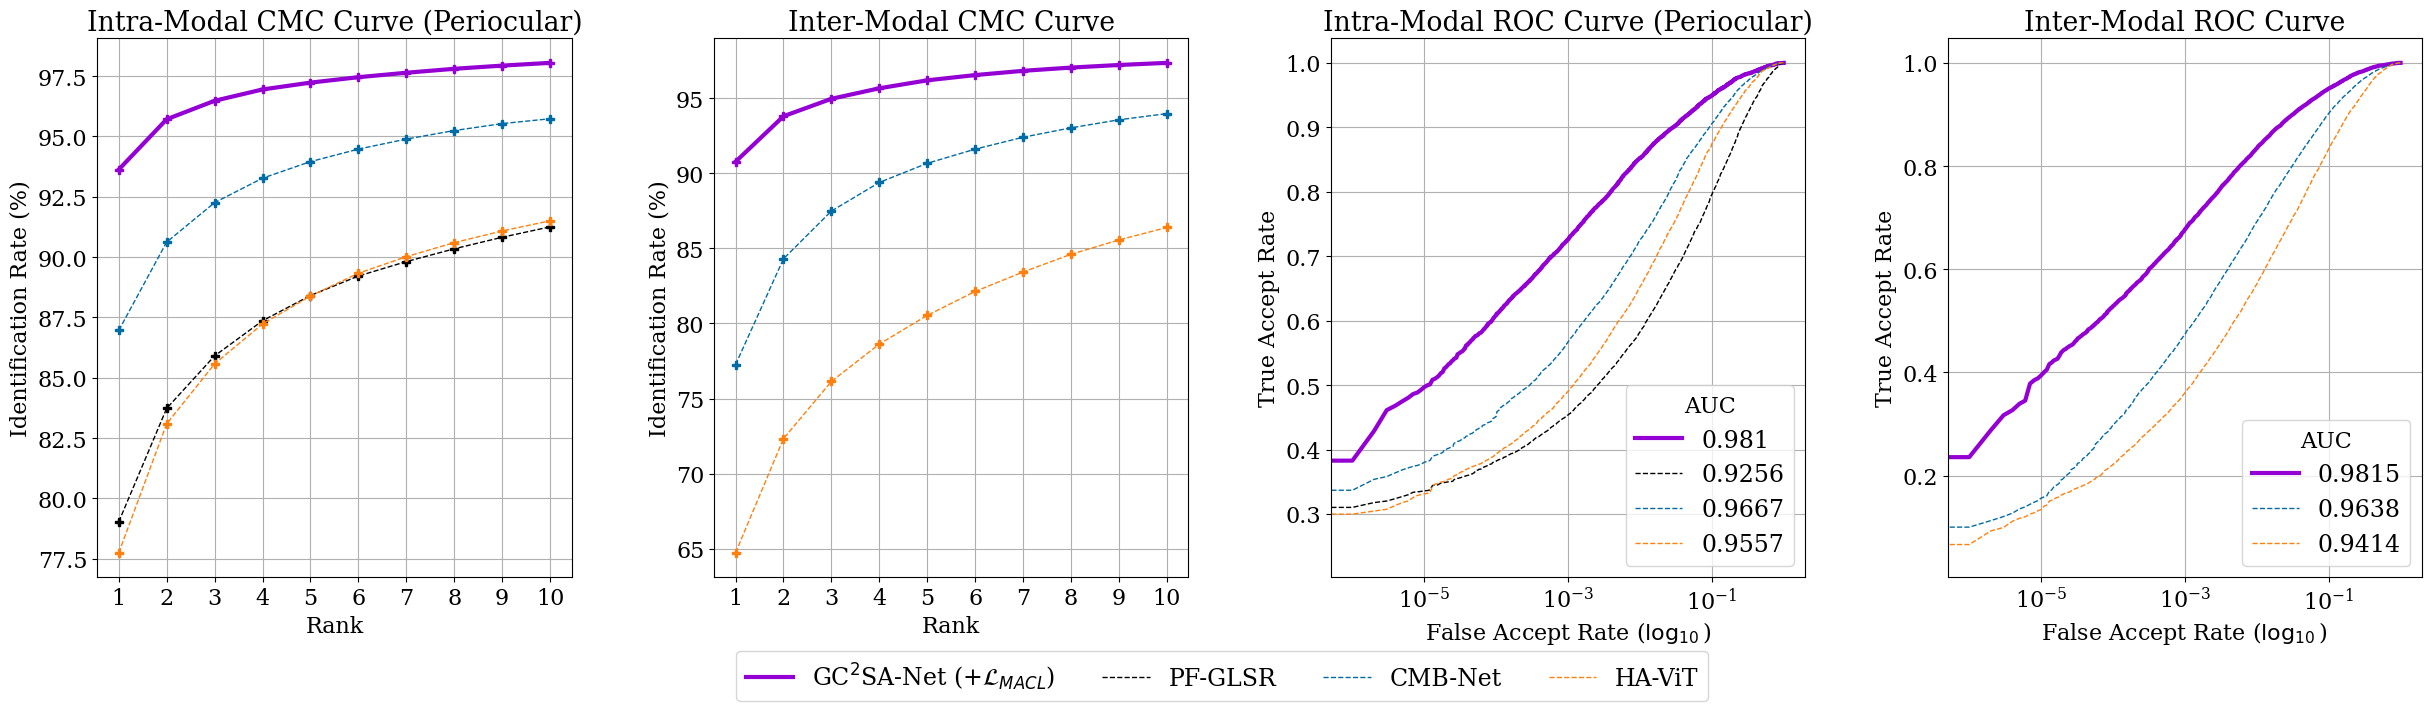

<Figure size 640x480 with 0 Axes>

In [6]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 16, 'legend.fontsize': 17})    

fig, axs = plt.subplots(nrows=1, ncols=4)
fig.set_figheight(7)
fig.set_figwidth(30)
plt.subplots_adjust(wspace=0.3)

# Intra-Modal CMC Curve
axs[0].grid(which='both')
axs[0].set_xticks(ticks)
axs[0].set_title('Intra-Modal CMC Curve (Periocular)')
axs[0].set_ylabel('Identification Rate (%)', loc='center')
axs[0].set_xlabel('Rank')
peri_cmc = axs[0].plot(rng, 100 * peri_avg_dict['avg'], marker = 'P', color = 'darkviolet', linewidth=3)
pf_glsr_peri_cmc = axs[0].plot(rng, 100 * pf_glsr_peri_avg_dict['avg'], marker = 'P', color = '#000000', linewidth=1, linestyle='--')
cmb_net_peri_cmc = axs[0].plot(rng, 100 * cmb_net_peri_avg_dict['avg'], marker = 'P', color = '#006BA4', linewidth=1, linestyle='--')
havit_peri_cmc = axs[0].plot(rng, 100 * havit_peri_avg_dict['avg'], marker = 'P', color = '#FF800E', linewidth=1, linestyle='--')

# Inter-Modal CMC Curve
axs[1].grid(which='both')
axs[1].set_xticks(ticks)
axs[1].set_title('Inter-Modal CMC Curve')
axs[1].set_ylabel('Identification Rate (%)', loc='center')
axs[1].set_xlabel('Rank')
peri_inter_cmc = axs[1].plot(rng, 100 * inter_avg_dict_p['avg'], marker = 'P', color = 'darkviolet', linewidth=3)
cmb_net_peri_inter_cmc = axs[1].plot(rng, 100 * cmb_net_inter_avg_dict_p['avg'], marker = 'P', color = '#006BA4', linewidth=1, linestyle='--')
havit_peri_inter_cmc = axs[1].plot(rng, 100 * havit_inter_avg_dict_p['avg'], marker = 'P', color = '#FF800E', linewidth=1, linestyle='--')

# Intra-Modal ROC Curve
axs[2].grid(which='both')
axs[2].set_title('Intra-Modal ROC Curve (Periocular)')
axs[2].set_ylabel('True Accept Rate')
axs[2].set_xlabel('False Accept Rate ($\log_{10}$)')
axs[2].semilogx(base=10)
peri_roc, = axs[2].plot(range_, peri_tpr, label=str(round(peri_avg, 4)), color = 'darkviolet', linewidth=3)
pf_glsr_peri_roc, = axs[2].plot(range_, pf_glsr_peri_tpr, label=str(round(pf_glsr_peri_avg, 4)), color = '#000000', linewidth=1, linestyle='--')
cmb_net_peri_roc, = axs[2].plot(range_, cmb_net_peri_tpr, label=str(round(cmb_net_peri_avg, 4)), color = '#006BA4', linewidth=1, linestyle='--')
havit_peri_roc, = axs[2].plot(range_, havit_peri_tpr, label=str(round(havit_peri_avg, 4)), color = '#FF800E', linewidth=1, linestyle='--')
axs[2].legend(bbox_to_anchor=(1, 0), loc="lower right", title="AUC")

# Inter-Modal ROC Curve
axs[3].grid(which='both')
axs[3].set_title('Inter-Modal ROC Curve')
axs[3].set_ylabel('True Accept Rate')
axs[3].set_xlabel('False Accept Rate ($\log_{10}$)')
axs[3].semilogx(base=10)
inter_roc, = axs[3].plot(range_, inter_tpr, label=str(round(inter_avg, 4)), color = 'darkviolet', linewidth=3)
cmb_net_inter_roc, = axs[3].plot(range_, cmb_net_inter_tpr, label=str(round(cmb_net_inter_avg, 4)), color = '#006BA4', linestyle='--', linewidth=1)
havit_inter_roc, = axs[3].plot(range_, havit_inter_tpr, label=str(round(havit_inter_avg, 4)), color = '#FF800E', linestyle='--', linewidth=1)
axs[3].legend(bbox_to_anchor=(1, 0), loc="lower right", title="AUC")

# Legends
line_labels = ["GC$^2$SA-Net (+$\mathcal{L}_{MACL}$)", "PF-GLSR", "CMB-Net", "HA-ViT"]

fig.legend( handles=[peri_roc, pf_glsr_peri_roc, cmb_net_peri_roc, havit_peri_roc],
            labels=line_labels,   # The labels for each line
            loc="lower center",
            bbox_to_anchor=(0.5, -0.07),
            ncol=6,    # Position of legend
            borderaxespad=0.1)

plt.savefig('../graphs/cmc_roc/peri_sota_CMC_ROC.pdf', bbox_inches='tight')
plt.show()
plt.clf()